## Autoencoder || Encoder Decoder Neural Network
- Keras Functional API
- Encoder Network
- Decoder Network
- Combine Encoder and Decoder
- MNIST Dataset

<b>Resources<b/>
- https://keras.io/examples/vision/autoencoder/
- https://keras.io/guides/functional_api/
- https://blog.keras.io/building-autoencoders-in-keras.html
- https://idiotdeveloper.com/building-convolutional-autoencoder-using-tensorflow-2/

## Import Library

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [69]:
import matplotlib.pyplot as plt
import cv2

## Encoder

In [3]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

In [4]:
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

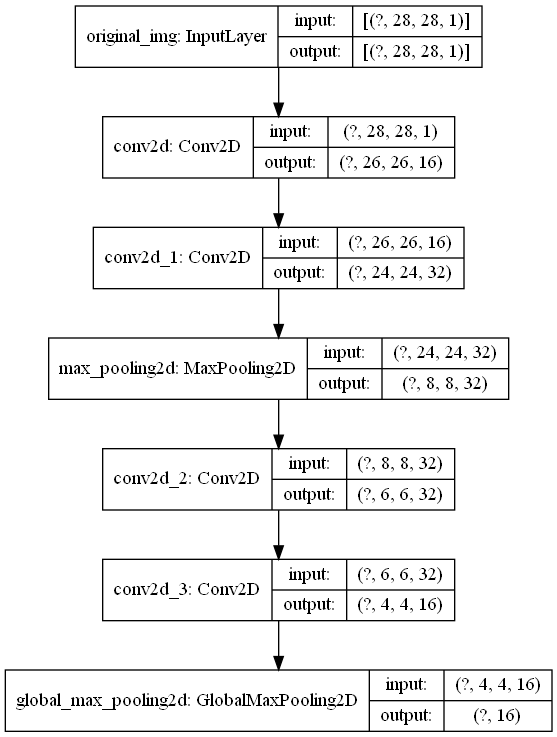

In [5]:
keras.utils.plot_model(encoder,'Encoder_Network.png',show_shapes=True)

## Decoder

In [6]:
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

In [7]:
decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145 

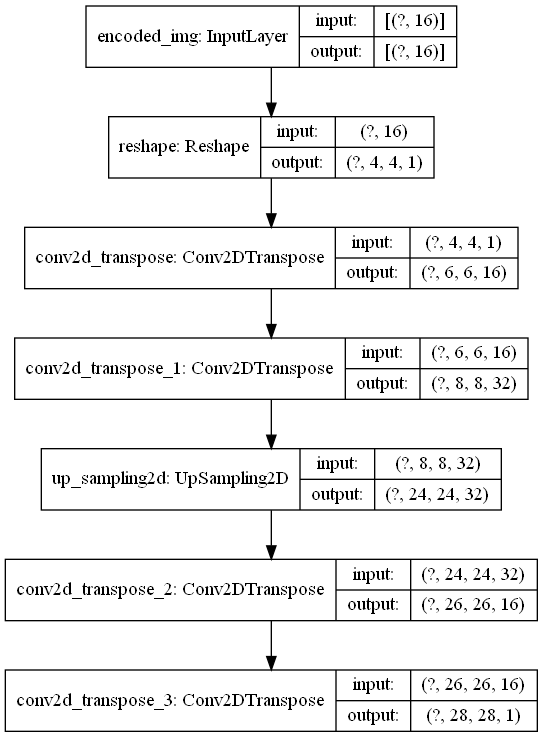

In [113]:
keras.utils.plot_model(decoder,'Decoder_Network.png',show_shapes=True)

## Autoencoder || Encoder + Decoder

In [114]:
autoencoder_input=keras.Input(shape=(28,28,1),name='img')

In [117]:
encoded_network=encoder(autoencoder_input)
decoded_network=decoder(encoded_network)

In [118]:
autoencoder=keras.Model(autoencoder_input,decoded_network,name='autoencoder')

In [119]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


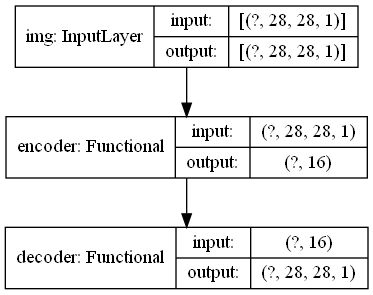

In [13]:
keras.utils.plot_model(autoencoder,'Encoder Decoder.png',show_shapes=True)

## Load Dataset

In [34]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

In [35]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalize and Flatten

In [36]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [37]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [38]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Compile and Trained Network

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2164 - val_loss: 0.2076
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2068 - val_loss: 0.2067
Epoch 3/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1989 - val_loss: 0.1807
Epoch 4/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.1846 - val_loss: 0.1755
Epoch 5/10
1875/1875 [==============================] - 85s 46ms/step - loss: 0.1773 - val_loss: 0.1693
Epoch 6/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.1823 - val_loss: 0.1757
Epoch 7/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1982 - val_loss: 0.1913
Epoch 8/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1870 - val_loss: 0.2346
Epoch 9/10
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1825 - val_loss: 0.1869
Epoch 10/10
1875/1875 [==============================] - 92s 49

In [42]:
predicted_image=autoencoder.predict(x_test)

In [45]:
predicted_image.shape

(10000, 28, 28, 1)

## Visualize Data

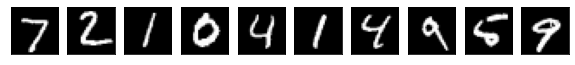

In [57]:
number=10
plt.figure(figsize=(10,10))
for i in range(number):
    ax=plt.subplot(1,number,i+1)
    plt.imshow(x_test[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])


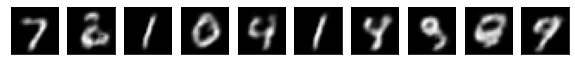

In [60]:
number=10
plt.figure(figsize=(10,10))
for i in range(number):
    ax=plt.subplot(1,number,i+1)
    plt.imshow(predicted_image[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])


## Evaluate Model with Custom Image

In [108]:
image=cv2.imread('cube.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image.shape

(283, 324)

(28, 28)


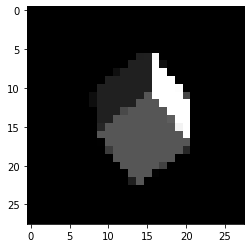

In [109]:
image=cv2.resize(image,(28,28))
image=image/255.0
print(image.shape)
plt.imshow(image,cmap='gray')

In [110]:
test_image=image.reshape(1,image.shape[0],image.shape[1],1)
test_image.shape

(1, 28, 28, 1)

In [111]:
predicted_result=autoencoder.predict(test_image)

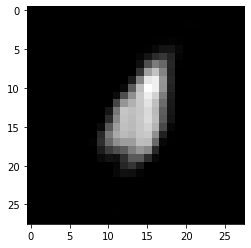

In [112]:
plt.imshow(predicted_result[0],cmap='gray')